In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/water-quality-dataset-with-wqi-result/WQI Dataset.csv


In [16]:
def intialise_parameters(lenw):
    w = np.random.randn(1,lenw)
    b = 0
    return w,b

In [17]:
def forward_prop(X,w,b):
    z = np.dot(w,X) + b
    return z

In [18]:
def cost_function(z,y,reg_penalty='',penalty_factor=0):
    m = y.shape[1]
    J = (1/(2*m))*np.sum(np.square(z-y),dtype=np.float64)
    penalty=0
    
    if reg_penalty=='L1':
        penalty = penalty_factor * np.sum(np.abs(w))
    elif reg_penalty=='L2':
        penalty =(penalty_factor / (2 * m))  * np.sum(np.square(w))
    
    return J+penalty

In [19]:
def back_prop(X, y, z, reg_penalty="", penalty_factor=0):
    m = y.shape[1]
    dz = (1/m)*(z-y)
    dw = np.dot(dz,X.T)
    if reg_penalty=="L1":
        l1_gradient = penalty_factor * np.sign(w)
        dw += l1_gradient
    elif reg_penalty=="L2":
        l2_gradient = (penalty_factor / m) * w
        dw += l2_gradient
    db = np.sum(dz)
    return dw,db


In [20]:
def gradient_descent_update(w,b,dw,db,learning_rate=0.01):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b

In [21]:
def linear_regresssion_model(X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=50,stop_loss=0.01,metric='RMSE',reg_penalty="",penalty_factor=0):
    X_train=X_train.T
    X_val=X_val.T
    y_train_arr = np.array([y_train])
    y_val_arr=np.array([y_val])
    
    lenw = X_train.shape[0]
    w,b = intialise_parameters(lenw)
    
    costs_train = []
    m_train = y_train_arr.shape[1]
    m_val = y_val_arr.shape[1]
    errors=[]
    error=0
    for i in range(1,epochs+1):
        z_train = forward_prop(X_train,w,b)
        cost_train = cost_function(z_train,y_train_arr,reg_penalty,penalty_factor)
        dw, db = back_prop(X_train,y_train_arr,z_train,reg_penalty,penalty_factor)
        w,b = gradient_descent_update(w,b,dw,db,learning_rate)
        costs_train.append(cost_train)
        if cost_train<stop_loss:
            print('reached stoploss')
            break
        
        z_val = forward_prop(X_val,w,b)    
        
        if metric=="MAE":
            error = (1/m_val)*np.sum(np.abs(z_val - y_val_arr),dtype=np.float64)
        elif metric=="MSE":
            error = (1/m_val)*np.sum(np.square(z_val - y_val_arr),dtype=np.float64)
        elif metric == "RMSE":
            error = np.sqrt((1/m_val) * np.sum(np.square(z_val - y_val_arr),dtype=np.float64),dtype=np.float64) 
        errors.append(error)
    return z_val,y_val_arr,w,b,errors
        

In [22]:
dataset=pd.read_csv('/kaggle/input/water-quality-dataset-with-wqi-result/WQI Dataset.csv',index_col='Unnamed: 0')
print(dataset.shape)

(501, 29)


In [23]:
dataset.head()

,WaterbodyName,Years,SampleDate,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Chloride,Conductivity @25°C,Dissolved Oxygen,ortho-Phosphate (as P) - unspecified,...,Horton WQI,Brown_values,Brown WQI,SRDD_values,SRDD WQI,CCME_WQI Label,WAWQI Label,Horton WQI Label,Brown WQI Label,SRDD WQI Label
1,Allua,2007,Aug,14.0,0.033,1.2,10.0,71,61.85,0.019,...,Moderate,97.649888,Excellent,96.242574,Excellent,3,2,4,1,1
2,Allua,2007,Aug,17.0,0.033,1.2,11.5,79,61.80,0.019,...,Moderate,97.388310,Excellent,95.983952,Excellent,3,2,4,1,1
3,Allua,2007,Aug,18.0,0.033,1.2,11.3,78,62.40,0.019,...,Moderate,97.303327,Excellent,95.922072,Excellent,3,2,4,1,1
4,Allua,2007,Sep,19.0,0.033,1.2,10.5,76,66.05,0.019,...,Moderate,97.182033,Excellent,95.710180,Excellent,3,2,4,1,1
5,Allua,2007,Sep,19.0,0.066,1.2,11.4,81,65.95,0.019,...,Moderate,97.140259,Excellent,95.548896,Excellent,3,2,4,1,1


In [24]:

# Selecting the desired columns
selected_columns = ['Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)',
                   'BOD - 5 days (Total)', 'Chloride', 'Conductivity @25°C',
                   'Dissolved Oxygen', 'ortho-Phosphate (as P) - unspecified', 'pH',
                   'Temperature', 'Total Hardness (as CaCO3)', 'True Colour']

dataset = dataset[selected_columns]

In [25]:
columns_to_scale = ['Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)', 'Chloride', 'Conductivity @25°C',
                   'Dissolved Oxygen', 'ortho-Phosphate (as P) - unspecified', 'pH',
                   'Temperature', 'Total Hardness (as CaCO3)', 'True Colour']


means = dataset[columns_to_scale].mean()
std_devs = dataset[columns_to_scale].std()
dataset[columns_to_scale] = (dataset[columns_to_scale] - means) / std_devs
dataset.head()

,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Chloride,Conductivity @25°C,Dissolved Oxygen,ortho-Phosphate (as P) - unspecified,pH,Temperature,Total Hardness (as CaCO3),True Colour
1,-0.890709,-0.074094,1.2,-0.925415,-1.119793,0.797556,0.227845,0.845459,2.306758,-0.841208,-0.127057
2,-0.845793,-0.074094,1.2,-0.693526,-1.067426,0.795231,0.227845,1.224952,2.402052,-0.804637,-0.239128
3,-0.830820,-0.074094,1.2,-0.724444,-1.073972,0.823140,0.227845,1.164233,2.306758,-0.803113,-0.201771
4,-0.815848,-0.074094,1.2,-0.848119,-1.087063,0.992926,0.227845,0.708841,3.037340,-0.810732,-0.351198
5,-0.815848,0.180584,1.2,-0.708985,-1.054334,0.988274,0.227845,0.799920,3.164398,-0.784827,-0.295163


In [26]:
y=dataset['BOD - 5 days (Total)']
y.describe()

count    501.000000
mean       1.194112
std        0.349048
min        0.300000
25%        1.200000
50%        1.200000
75%        1.200000
max        3.500000
Name: BOD - 5 days (Total), dtype: float64

In [27]:
X=dataset.drop(columns=['BOD - 5 days (Total)'])
X.describe()

,Alkalinity-total (as CaCO3),Ammonia-Total (as N),Chloride,Conductivity @25°C,Dissolved Oxygen,ortho-Phosphate (as P) - unspecified,pH,Temperature,Total Hardness (as CaCO3),True Colour
count,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02
mean,-8.509494e-17,-3.545622e-17,3.120148e-16,2.836498e-17,-2.836498e-16,-5.672996e-17,3.403798e-16,-2.481936e-16,-1.701899e-16,1.772811e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.025459e+00,-3.287720e-01,-1.698379e+00,-1.322719e+00,-2.079494e+00,-1.823484e+00,-2.175305e+00,-2.775553e+00,-9.996842e-01,-7.807996e-01
25%,-8.757370e-01,-1.358343e-01,-8.635779e-01,-1.067426e+00,-4.793236e-01,-7.374863e-01,-7.028725e-01,-6.155709e-01,-7.878751e-01,-5.006244e-01
50%,-2.618783e-01,-7.409424e-02,2.141464e-03,1.894022e-01,4.507753e-01,2.278452e-01,5.611345e-02,-1.204640e-02,-6.339706e-01,-1.644142e-01
75%,8.011451e-01,-7.409424e-02,4.040826e-01,7.458103e-01,5.579960e-01,2.278452e-01,5.115050e-01,4.326558e-01,6.612653e-01,5.972597e-02
max,3.151774e+00,1.510624e+01,3.712367e+00,2.775063e+00,3.037329e+00,4.571837e+00,4.458232e+00,3.259692e+00,3.068880e+00,1.701966e+01


In [28]:
X.head()

,Alkalinity-total (as CaCO3),Ammonia-Total (as N),Chloride,Conductivity @25°C,Dissolved Oxygen,ortho-Phosphate (as P) - unspecified,pH,Temperature,Total Hardness (as CaCO3),True Colour
1,-0.890709,-0.074094,-0.925415,-1.119793,0.797556,0.227845,0.845459,2.306758,-0.841208,-0.127057
2,-0.845793,-0.074094,-0.693526,-1.067426,0.795231,0.227845,1.224952,2.402052,-0.804637,-0.239128
3,-0.830820,-0.074094,-0.724444,-1.073972,0.823140,0.227845,1.164233,2.306758,-0.803113,-0.201771
4,-0.815848,-0.074094,-0.848119,-1.087063,0.992926,0.227845,0.708841,3.037340,-0.810732,-0.351198
5,-0.815848,0.180584,-0.708985,-1.054334,0.988274,0.227845,0.799920,3.164398,-0.784827,-0.295163


In [29]:
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    # Set seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle indices
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    # Determine split index
    split_index = int((1 - test_size) * num_samples)
    
    # Split data
    X_train, X_test = X.iloc[indices[:split_index]], X.iloc[indices[split_index:]]
    y_train, y_test = y.iloc[indices[:split_index]], y.iloc[indices[split_index:]]
    
    return X_train, X_test, y_train, y_test

In [30]:
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.2, random_state=5)


In [31]:
z_val,y_val_arr,w,b,errors_n=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=700)
print(w)

[[-0.04252585  0.00382883 -0.08487292 -0.08912117 -0.05592845  0.03672293
   0.07983126  0.05998712  0.05368214  0.01630715]]


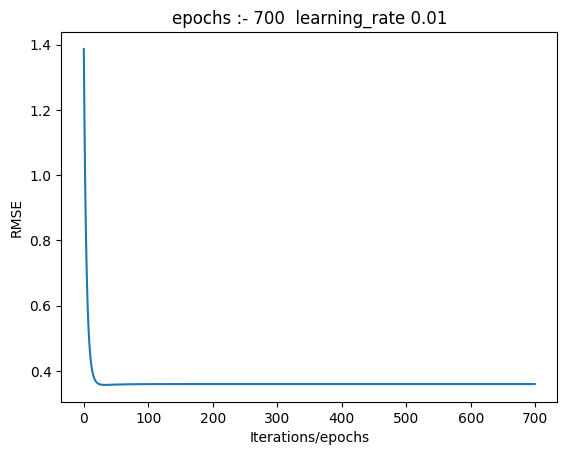

In [32]:
plt.plot(errors_n)
plt.xlabel('Iterations/epochs')
plt.ylabel('RMSE')

plt.title('epochs :- 700  learning_rate 0.01' )
plt.show()

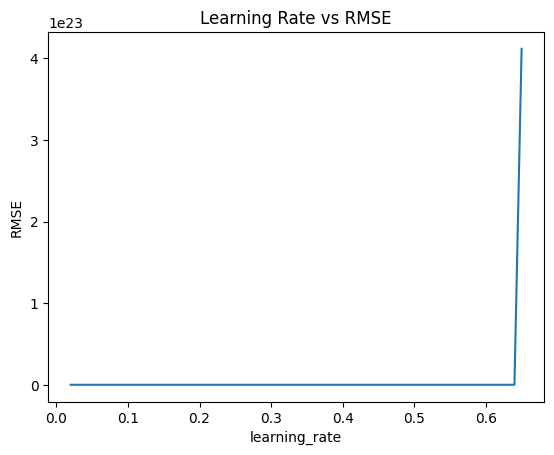

In [33]:
# z_val,y_val,w,b,errors=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.01,epochs=50)
# epchs 50 
# learning rate 0.02 - 1
final_error = []
learningRates=[]

for i in range(2, 66):
    learningRate = (i)/100
    z_val,y_val_arr,w,b,errors=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate = learningRate,epochs=400)
    final_error.append(errors[-1])
    learningRates.append(learningRate)

plt.plot(learningRates,final_error)  
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.title('Learning Rate vs RMSE')
plt.show()

#### Optimal learning rate would be at 0.1 to 0.2

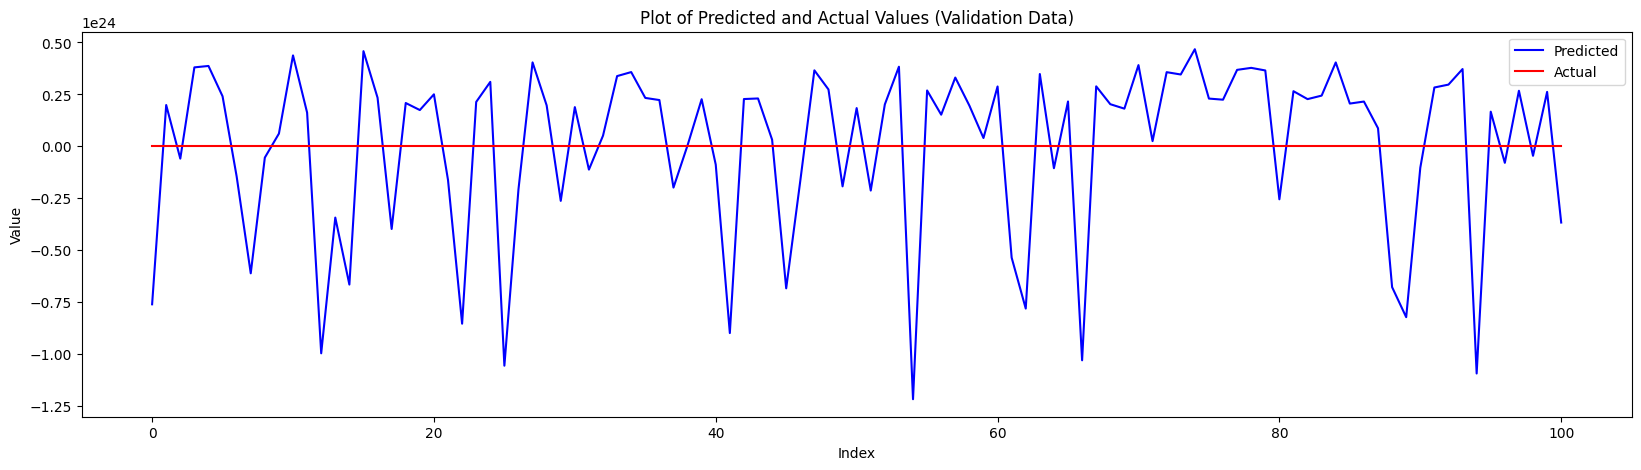

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(z_val[0], label='Predicted', color='blue')
plt.plot(y_val_arr[0], label='Actual', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Predicted and Actual Values (Validation Data)')
plt.legend()
plt.show()

In [35]:
len(y_val)

101

In [36]:
from sklearn import linear_model

In [37]:
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train,y_train)
prediction = linear_regression.predict(X_val)


In [38]:
prediction.shape

(101,)

In [39]:
MAE_val_with_sklearn = (1/len(y_val))*np.sum(np.abs(prediction-y_val.T))

In [40]:
MAE_val_with_sklearn

0.206341287285035

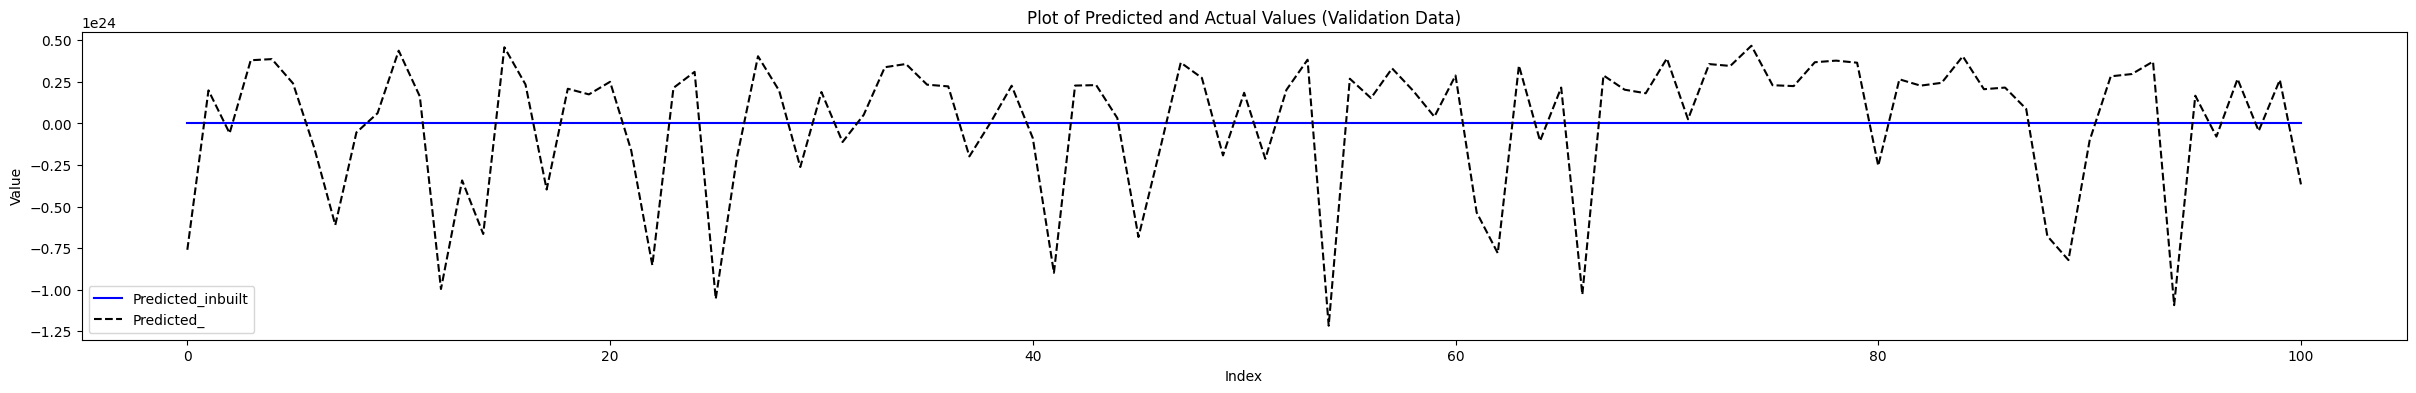

In [41]:
plt.figure(figsize=(30, 4))
plt.plot(prediction, label='Predicted_inbuilt', color='blue')
plt.plot(z_val[0], label='Predicted_', color='black',linestyle='--')
# plt.plot(y_val_arr[0], label='Actual', color='red')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Predicted and Actual Values (Validation Data)')
plt.legend()
plt.show()

In [42]:
z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=400,reg_penalty="L1",penalty_factor=0.1)
z_val,y_val_arr,w,b,errors_l2=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=400,reg_penalty="L2",penalty_factor=0.1)
z_val,y_val_arr,w,b,errors_n=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=400)

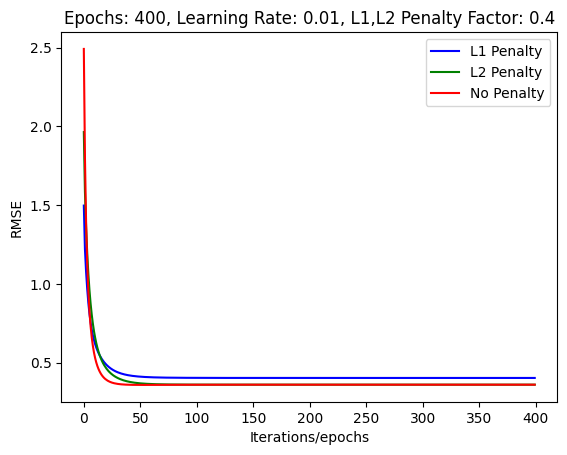

In [43]:
plt.plot(errors_l1, label='L1 Penalty', color='blue')
plt.plot(errors_l2, label='L2 Penalty', color='green')
plt.plot(errors_n, label='No Penalty', color='red')

plt.xlabel('Iterations/epochs')
plt.title('Epochs: 400, Learning Rate: 0.01, L1,L2 Penalty Factor: 0.4')
plt.ylabel('RMSE')

plt.legend()
plt.show()

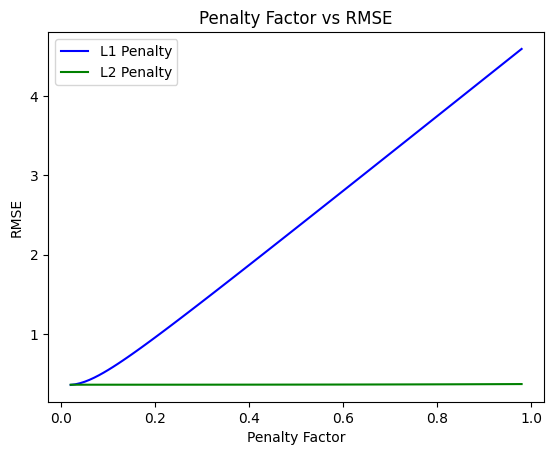

In [44]:
error_reg_l1 = []
error_reg_l2 = []
penalty_list=[]
for i in range(2, 99):
    penalty = (i)/100
    z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.5,epochs=100,reg_penalty="L1",penalty_factor=penalty)
    z_val,y_val_arr,w,b,errors_l2=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.5,epochs=100,reg_penalty="L2",penalty_factor=penalty)
    error_reg_l1.append(errors_l1[-1])
    error_reg_l2.append(errors_l2[-1])
    penalty_list.append(penalty)
plt.plot(penalty_list,error_reg_l1,label='L1 Penalty', color='blue')
plt.plot(penalty_list,error_reg_l2,label='L2 Penalty', color='green')
plt.title('Penalty Factor vs RMSE')
plt.xlabel('Penalty Factor')
plt.ylabel('RMSE')

plt.legend()
plt.show()


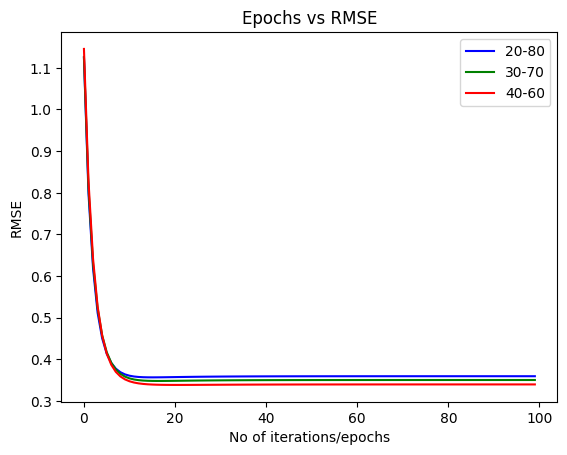

In [45]:
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.2, random_state=5)
z_val,y_val_arr,w,b,errors_80=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100)
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.3, random_state=5)
z_val,y_val_arr,w,b,errors_70=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100)
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.4, random_state=5)
z_val,y_val_arr,w,b,errors_60=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.4,epochs=100)
plt.plot(errors_80, label='20-80', color='blue')
plt.plot(errors_70, label='30-70', color='green')
plt.plot(errors_60, label='40-60', color='red')
plt.ylabel('RMSE')
plt.xlabel('No of iterations/epochs')
plt.title('Epochs vs RMSE')
plt.legend()
plt.show()

##### good split could be 40-60
##### epochs could be 200
##### L1 penalty factor doesnt affect

In [46]:
X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=0.4, random_state=5)
z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.1,epochs=100,reg_penalty="L1",penalty_factor=0.1)
print(w)

[[ 0.38946583 -0.10118743  0.21014338  0.02599435  0.15888345  0.06541577
  -0.06064101  0.09663422 -0.43253405  0.07603047]]


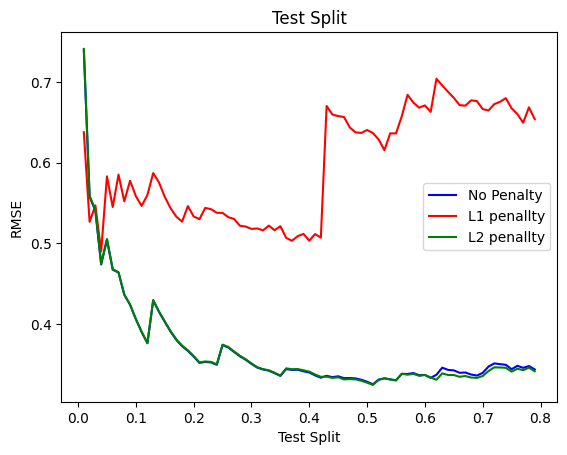

In [47]:
error_split = []
error_split_l1=[]
error_split_l2=[]
split_list=[]
for i in range(1, 80):
    split= (i)/100
    X_train, X_val, y_train, y_val = train_test_split_custom(X, y, test_size=split, random_state=5)
    z_val,y_val_arr,w,b,errors_norm=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=100)
    z_val,y_val_arr,w,b,errors_l1=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=100,reg_penalty="L1",penalty_factor=0.1)
    z_val,y_val_arr,w,b,errors_l2=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=100,reg_penalty="L2",penalty_factor=0.1)
    error_split.append(errors_norm[-1])
    error_split_l1.append(errors_l1[-1])
    error_split_l2.append(errors_l2[-1])
    split_list.append(split)
plt.plot(split_list,error_split,label='No Penalty', color='blue')
plt.plot(split_list,error_split_l1,label='L1 penallty',color='red')
plt.plot(split_list,error_split_l2,label='L2 penallty',color='green')
plt.xlabel('Test Split')
plt.ylabel('RMSE')
plt.title('Test Split')
plt.legend()
plt.show()


In [48]:
class MyPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components   
        
    def fit(self, X):
        # Standardize data 
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean) / self.scale
        
        # Eigendecomposition of covariance matrix       
        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
        
        # Adjusting the eigenvectors that are largest in absolute value to be positive    
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T
       
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = eig_vecs_sorted[:self.n_components,:]
        
        # Explained variance ratio
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]
        
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)
        
        return X_proj
    

# ---------------------------------------------------------
my_pca = MyPCA(n_components = 5).fit(X)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

X_proj = my_pca.transform(X)
print('Transformed data shape from scratch:', X_proj.shape)


Components:
 [[ 0.42154905  0.05570074  0.39901807  0.39668938 -0.40990942  0.23398472
   0.22586812 -0.03257796  0.47036063 -0.08077442]
 [-0.07988173  0.34333048  0.25723642  0.3009502  -0.02167029 -0.39078946
  -0.42190429 -0.36515581 -0.00164572  0.50445097]
 [ 0.09408835  0.63293593 -0.1724326  -0.25702276 -0.05965939  0.4066209
   0.11889944  0.31189574 -0.00648101  0.46302048]
 [-0.35574066  0.03895266  0.34048643  0.22578846 -0.10066154 -0.36874962
   0.3229626   0.64998112 -0.16929604  0.05890133]
 [ 0.28680274 -0.31077083 -0.19514178  0.17598512  0.26790405 -0.04400811
  -0.46484902  0.53509512  0.35178361  0.22856553]]
Explained variance ratio from scratch:
 [0.3325622735913207, 0.166719072490158, 0.14107520839265086, 0.09320668406366292, 0.07477834020937316]
Cumulative explained variance from scratch:
 [0.33256227 0.49928135 0.64035655 0.73356324 0.80834158]
Transformed data shape from scratch: (501, 5)


In [49]:
X_train, X_val, y_train, y_val = train_test_split_custom(X_proj, y, test_size=0.4, random_state=5)
z_val,y_val_arr,w,b,errors_norm=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=200)


In [50]:
my_pca = MyPCA(n_components = 5).fit(X)
X_proj = my_pca.transform(X)
X_train, X_val, y_train, y_val = train_test_split_custom(X_proj, y, test_size=0.4, random_state=5)
z_val,y_val_arr,w,b,errors_norm=linear_regresssion_model(X_train, y_train, X_val, y_val,learning_rate=0.2,epochs=200)


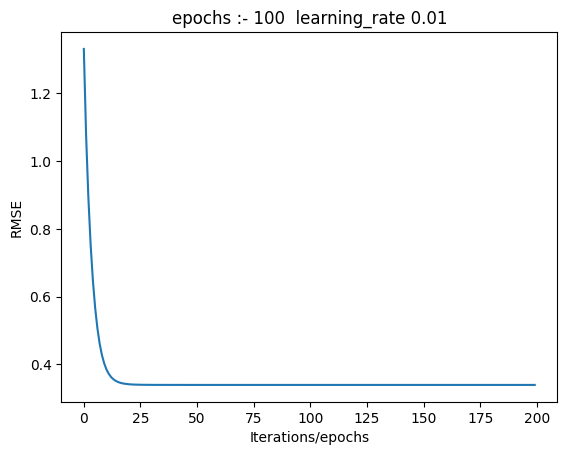

In [51]:
plt.plot(errors_norm)
plt.xlabel('Iterations/epochs')
plt.ylabel('RMSE')

plt.title('epochs :- 100  learning_rate 0.01' )
plt.show()

##### lets take upto 5 features from pca and do the polynomial analysis for it 

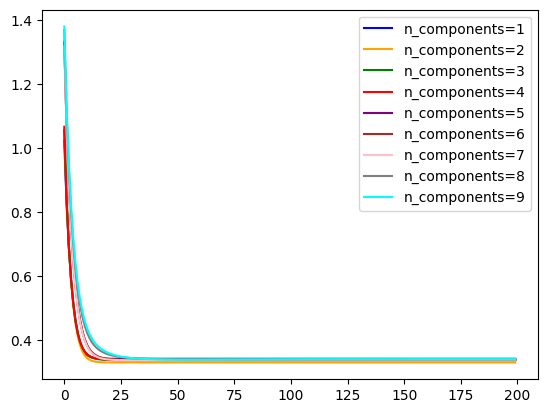

In [52]:
errors_list = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan']

for i in range(1, 10):
    my_pca = MyPCA(n_components=i).fit(X)
    X_proj = my_pca.transform(X)
    X_train, X_val, y_train, y_val = train_test_split_custom(X_proj, y, test_size=0.4, random_state=5)
    z_val, y_val_arr, w, b, errors_norm = linear_regresssion_model(X_train, y_train, X_val, y_val, learning_rate=0.2, epochs=200)
    plt.plot(errors_norm, label=f'n_components={i}', color=colors[i-1])

plt.legend()
plt.show()


In [53]:
class SVR:
    def __init__(self, epsilon=0.5):
        self.epsilon = epsilon
        self.W = None
        self.intercept_ = None

    def _compute_loss(self, X, y):
        y_pred = np.dot(X, self.W) + self.intercept_
        error = np.maximum(0, np.abs(y_pred - y) - self.epsilon)
        loss = np.linalg.norm(self.W) / 2 + np.mean(error)
        return loss

    def fit(self, X, y, epochs=100, learning_rate=0.01):
        feature_len = X.shape[-1] if len(X.shape) > 1 else 1
        
        self.W = np.random.randn(feature_len)
        self.intercept_ = np.random.randn(1)

        for epoch in range(epochs):
            loss = self._compute_loss(X, y)
            # print("{}/{}: loss: {}".format(epoch + 1, epochs, loss))

            # Compute gradients
            y_pred = np.dot(X, self.W) + self.intercept_
            error = y_pred - y
            
            grad_W = np.dot(X.T, np.where(np.abs(error) > self.epsilon, np.sign(error), 0))
            grad_b = np.sum(np.where(np.abs(error) > self.epsilon, np.sign(error), 0))
            # Update weights
            self.W = self.W - learning_rate * grad_W / len(y)
            self.intercept_ -= learning_rate * grad_b / len(y)
        
        return self

    def predict(self, X):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        y_pred = np.dot(X, self.W) + self.intercept_
        return y_pred

In [54]:
def train_test_split_custom_with_array(X, y, test_size=0.2, random_state=None):
    # Set seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle indices
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    # Determine split index
    split_index = int((1 - test_size) * num_samples)
    
    # Split data
    X_train, X_test = X.iloc[indices[:split_index]].values, X.iloc[indices[split_index:]].values
    y_train, y_test = y.iloc[indices[:split_index]].values, y.iloc[indices[split_index:]].values
    
    return X_train, X_test, y_train, y_test


In [55]:
def compute_rmse(y_test,y_pred):
    rmse = 0
    for i in range(len(y_test)):
        rmse += (y_pred[i] - y_test[i])**2
    rmse = (rmse / len(y_test))**0.5
    return rmse 

In [56]:
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)

In [57]:
model=SVR(epsilon=0.5)
model.fit(X_train,y_train,epochs=100,learning_rate=0.01)
y_pred=model.predict(X_test)
print(compute_rmse(y_test,y_pred))

2.3546701398077796


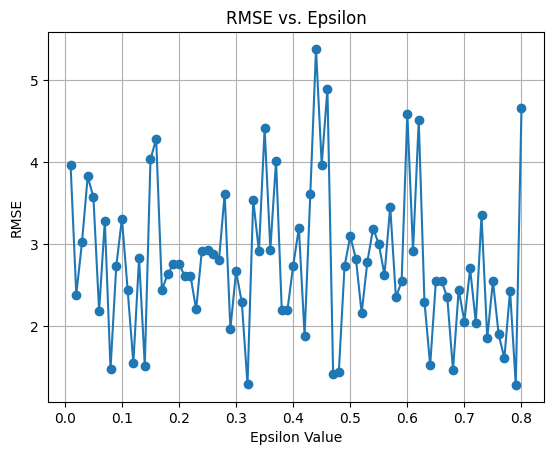

In [58]:
error_epsilon = []
epsilon_values = []
d_epsilon = 0.01
while d_epsilon <= 0.8:
    model = SVR(epsilon=d_epsilon)
    model.fit(X_train, y_train, epochs=100, learning_rate=0.01)
    y_pred = model.predict(X_test)
    error = compute_rmse(y_test, y_pred)
    error_epsilon.append(error)
    epsilon_values.append(d_epsilon)
    d_epsilon = round(d_epsilon + 0.01, 2)  # Increment by 0.01 and round to 2 decimal places

# Plotting
plt.plot(epsilon_values, error_epsilon, marker='o', linestyle='-')
plt.title('RMSE vs. Epsilon')
plt.xlabel('Epsilon Value')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


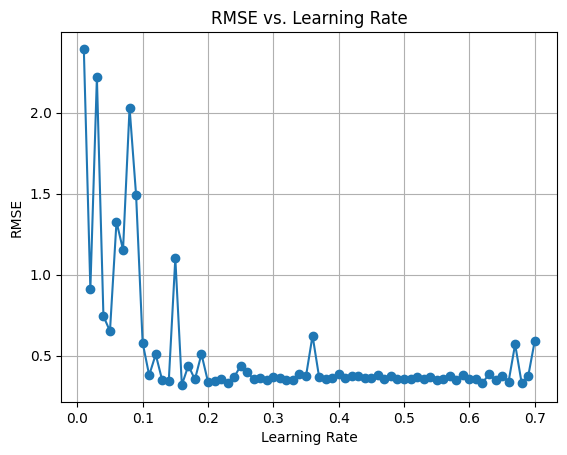

In [59]:
error_lr = []
learning_rates = []
d_lr = 0.01
while d_lr <= 0.7:
    model = SVR(epsilon=0.5)
    model.fit(X_train, y_train, epochs=100, learning_rate=d_lr)
    y_pred = model.predict(X_test)
    error = compute_rmse(y_test, y_pred)
    error_lr.append(error)
    learning_rates.append(d_lr)
    d_lr = round(d_lr + 0.01, 2)  

plt.plot(learning_rates, error_lr, marker='o', linestyle='-')
plt.title('RMSE vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()




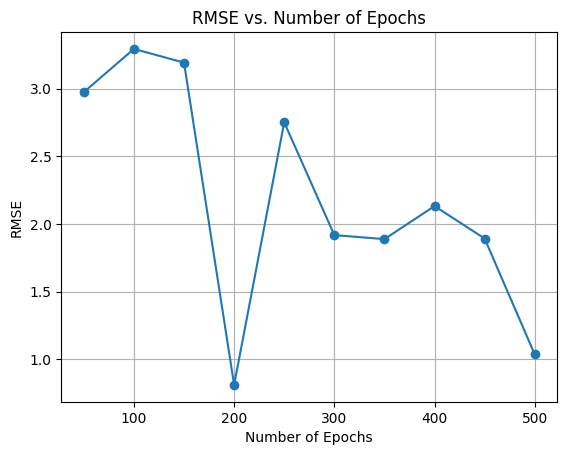

In [60]:
error_epoch = []
epochs_values = []
d_epoch = 50
while d_epoch <= 500:
    model = SVR(epsilon=0.5)
    model.fit(X_train, y_train, epochs=d_epoch, learning_rate=0.01)
    y_pred = model.predict(X_test)
    error = compute_rmse(y_test, y_pred)
    error_epoch.append(error)
    epochs_values.append(d_epoch)
    d_epoch += 50  # Increment by 50 for the next iteration

# Plotting
plt.plot(epochs_values, error_epoch, marker='o', linestyle='-')
plt.title('RMSE vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()




##### with pca 

In [61]:
rmse_list = []

for n_features in range(1, 11):
    my_pca = MyPCA(n_components=n_features).fit(X)
    X_proj = my_pca.transform(X)
    X_train, X_val, y_train, y_val = train_test_split_custom_with_array(X_proj, y, test_size=0.4, random_state=5)
    model = SVR(epsilon=0.5)
    model.fit(X_train, y_train, epochs=250, learning_rate=0.20)
    y_pred = model.predict(X_val)
    rmse = compute_rmse(y_val, y_pred)
    rmse_list.append(rmse)

print(rmse_list)


[0.38451445726391825, 0.36718511101327544, 0.36764219925135627, 0.37230235346497237, 0.36850945306845767, 0.3751695433569308, 0.3765680868629122, 0.3822162032590139, 0.3828642356110051, 0.3872971090657998]


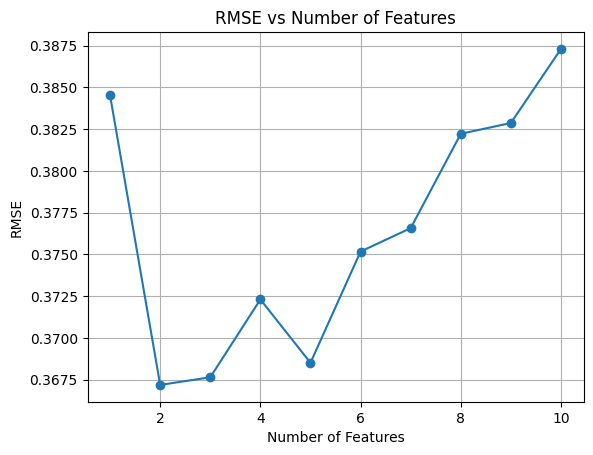

In [62]:
n_features = list(range(1, 11))

# Plot RMSE values
plt.plot(n_features, rmse_list, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features')
plt.grid(True)
plt.show()

In [63]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [64]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.column_names = None  # To store column names
    
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, columns, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print(columns[tree.feature_index], "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(columns, tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(columns, tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        self.column_names = columns
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions


In [65]:
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)

In [66]:
X_train

array([[-0.33673915,  0.21917106,  0.1567342 , ..., -0.90145089,
         0.32602775, -0.18309254],
       [-0.93562561, -0.02007168,  0.40408258, ..., -0.71086421,
         1.27078799,  0.00369093],
       [-0.89070912, -0.20529187,  0.40408258, ...,  0.33736251,
        -0.81682738,  0.1531177 ],
       ...,
       [-0.87573696, -0.20529187,  0.40408258, ..., -0.99674423,
        -0.74063704, -0.44458939],
       [ 0.80114512, -0.02007168, -1.0800077 , ...,  0.01971805,
         1.27078799,  0.1531177 ],
       [ 0.02259272, -0.07409424,  0.1567342 , ...,  0.24206917,
         0.66126526,  0.05972597]])

In [67]:
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
y_train_reshaped =y_train.reshape(-1,1)
columns=list(X.columns)

regressor.fit(X_train,y_train_reshaped)
regressor.print_tree(columns)

Ammonia-Total (as N) <= -0.22072688585636444 ? 0.018159741444249006
 left:pH <= -0.4448172958904581 ? 0.03906574027960755
  left:True Colour <= 0.4146145560472173 ? 0.026060854873871046
    left:Chloride <= -0.6780665816526327 ? 0.019928027777777784
        left:1.0
        right:0.5294444444444445
    right:Temperature <= 1.0361803240890415 ? 0.024084284395198524
        left:0.8193333333333332
        right:1.2000000000000002
  right:Dissolved Oxygen <= 0.6026519260079403 ? 0.1465918929555293
    left:Temperature <= 0.972651431918863 ? 0.03512018140589569
        left:1.02
        right:1.9
    right:2.9
 right:Chloride <= -1.1093803198632184 ? 0.015602973209371915
  left:pH <= 0.23827009160701343 ? 0.08451245321759204
    left:Total Hardness (as CaCO3) <= -0.8168273812889814 ? 0.035548191166321644
        left:1.2256521739130433
        right:1.6714285714285713
    right:Total Hardness (as CaCO3) <= -0.7772084033822712 ? 0.17817214087851208
        left:2.1785714285714284
        ri

In [68]:
y_pred=regressor.predict(X_test)
compute_rmse(y_test,y_pred)

0.2582643676770498

In [69]:
errors_mse=[]
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)
for i in range(2,10):
    regressor = DecisionTreeRegressor(min_samples_split=i, max_depth=3)
    y_train_reshaped =y_train.reshape(-1,1)
    columns=list(X.columns)
    regressor.fit(X_train,y_train_reshaped)
    regressor.print_tree(columns)
    y_pred=regressor.predict(X_test)
    errors_mse.append(compute_rmse(y_test,y_pred))
    print(i)


Ammonia-Total (as N) <= -0.22072688585636444 ? 0.018159741444249006
 left:pH <= -0.4448172958904581 ? 0.03906574027960755
  left:True Colour <= 0.4146145560472173 ? 0.026060854873871046
    left:Chloride <= -0.6780665816526327 ? 0.019928027777777784
        left:1.0
        right:0.5294444444444445
    right:Temperature <= 1.0361803240890415 ? 0.024084284395198524
        left:0.8193333333333332
        right:1.2000000000000002
  right:Dissolved Oxygen <= 0.6026519260079403 ? 0.1465918929555293
    left:Temperature <= 0.972651431918863 ? 0.03512018140589569
        left:1.02
        right:1.9
    right:2.9
 right:Chloride <= -1.1093803198632184 ? 0.015602973209371915
  left:pH <= 0.23827009160701343 ? 0.08451245321759204
    left:Total Hardness (as CaCO3) <= -0.8168273812889814 ? 0.035548191166321644
        left:1.2256521739130433
        right:1.6714285714285713
    right:Total Hardness (as CaCO3) <= -0.7772084033822712 ? 0.17817214087851208
        left:2.1785714285714284
        ri

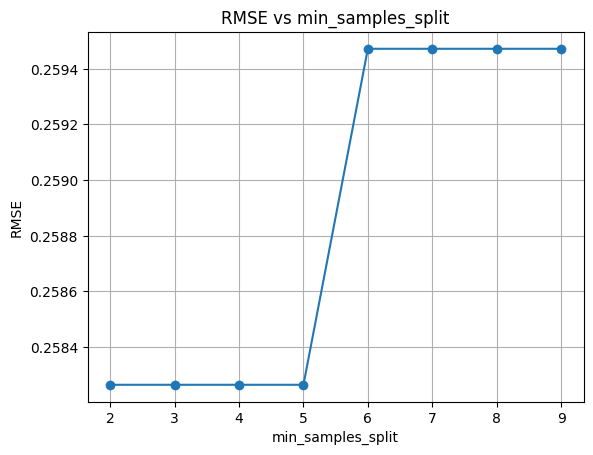

In [70]:
# Plotting the error_mse
plt.plot(range(2, 10), errors_mse, marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.title('RMSE vs min_samples_split')
plt.grid(True)
plt.show()

In [71]:
errors_mse=[]
X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X, y, test_size=0.2, random_state=24)
for i in range(2,7):
    regressor = DecisionTreeRegressor(min_samples_split=7, max_depth=i)
    y_train_reshaped =y_train.reshape(-1,1)
    columns=list(X.columns)
    regressor.fit(X_train,y_train_reshaped)
    regressor.print_tree(columns)
    y_pred=regressor.predict(X_test)
    errors_mse.append(compute_rmse(y_test,y_pred))
    print(i)

Ammonia-Total (as N) <= -0.22072688585636444 ? 0.018159741444249006
 left:pH <= -0.4448172958904581 ? 0.03906574027960755
  left:True Colour <= 0.4146145560472173 ? 0.026060854873871046
    left:0.5765
    right:0.8994736842105263
  right:Dissolved Oxygen <= 0.6026519260079403 ? 0.1465918929555293
    left:1.0619047619047617
    right:2.9
 right:Chloride <= -1.1093803198632184 ? 0.015602973209371915
  left:pH <= 0.23827009160701343 ? 0.08451245321759204
    left:1.3296666666666672
    right:1.9263157894736842
  right:pH <= -1.704734032830241 ? 0.0034865173874042907
    left:0.76
    right:1.2136140350877194
2
Ammonia-Total (as N) <= -0.22072688585636444 ? 0.018159741444249006
 left:pH <= -0.4448172958904581 ? 0.03906574027960755
  left:True Colour <= 0.4146145560472173 ? 0.026060854873871046
    left:Chloride <= -0.6780665816526327 ? 0.019928027777777784
        left:1.0
        right:0.5294444444444445
    right:Temperature <= 1.0361803240890415 ? 0.024084284395198524
        left:0.8

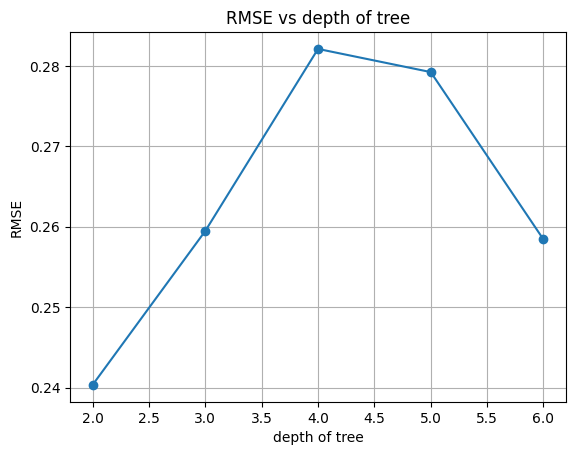

In [72]:
# Plotting the error_mse
plt.plot(range(2, 7), errors_mse, marker='o')
plt.xlabel('depth of tree')
plt.ylabel('RMSE')
plt.title('RMSE vs depth of tree')
plt.grid(True)
plt.show()

In [73]:
rmse_list = []

for n_features in range(1, 11):
    my_pca = MyPCA(n_components=n_features).fit(X)
    X_proj = my_pca.transform(X)
    X_train,X_test,y_train,y_test=train_test_split_custom_with_array(X_proj, y, test_size=0.2, random_state=24)
    regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
    y_train_reshaped =y_train.reshape(-1,1)
    columns=list(X.columns)
    regressor.fit(X_train,y_train_reshaped)
    regressor.print_tree(columns)
    y_pred=regressor.predict(X_test)
    errors_mse.append(compute_rmse(y_test,y_pred))
    rmse_list.append(rmse)

print(rmse_list)

Alkalinity-total (as CaCO3) <= -1.5282732213687868 ? 0.01749941190400743
 left:Alkalinity-total (as CaCO3) <= -2.1618074141166304 ? 0.012362740920774828
  left:Alkalinity-total (as CaCO3) <= -2.224947264888184 ? 0.5445000000000001
    left:Alkalinity-total (as CaCO3) <= -2.2744288006640776 ? 0.052266666666666683
        left:1.7999999999999998
        right:1.3333333333333333
    right:3.5
  right:Alkalinity-total (as CaCO3) <= -1.528726592216092 ? 0.006701826656588639
    left:Alkalinity-total (as CaCO3) <= -1.7026690234355395 ? 0.007589367816091874
        left:1.5379310344827593
        right:1.3633333333333333
    right:2.1
 right:Alkalinity-total (as CaCO3) <= -0.7698068965108913 ? 0.0016169525288569075
  left:Alkalinity-total (as CaCO3) <= -1.4105025023753812 ? 0.001806627547186912
    left:Alkalinity-total (as CaCO3) <= -1.4301914196405838 ? 0.005362723214285716
        left:1.1785714285714284
        right:1.4
    right:Alkalinity-total (as CaCO3) <= -1.3793349692422465 ? 0.003

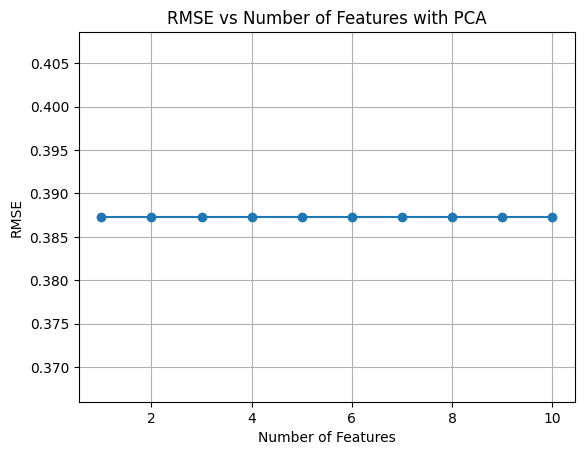

In [74]:
n_features = list(range(1, 11))

# Plot RMSE values
plt.plot(n_features, rmse_list, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features with PCA')
plt.grid(True)
plt.show()
